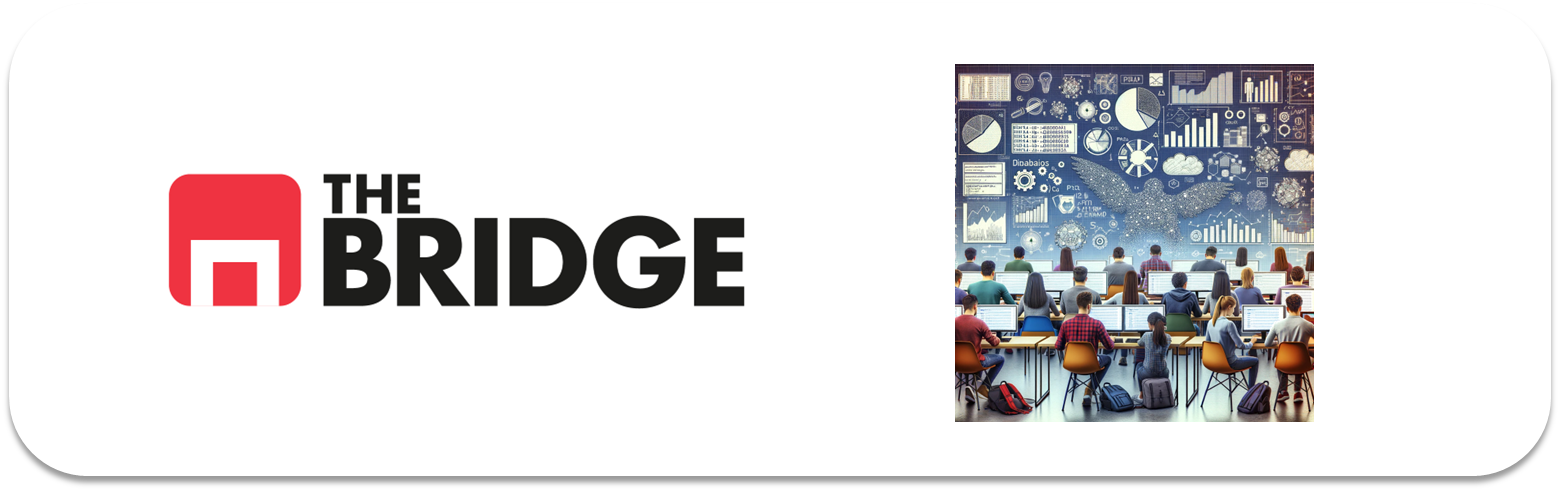

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Queremos averiguar la mediana del precio de las casas de una zona de boston
#MEDV : Valor medio de las viviendas ocupadas por propietarios en dolares
target = "MEDV:"

In [16]:
#OBJETIVOS
#Modelo de Regresión Lineal
#Evaluarlo con un dataset de test  MAE, RMSE, MSE, R2
#Hacer una regularización probando 3 valores diferentes de hiperparámetros

In [17]:
#1. CARGAR EL DATASET. ESTÁ LIMPIO.
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [18]:
#1.1. RENOMBRAR COLUMNAS PARA SABER QUE ESTOY VIENDO
nombres_nuevos = ["Crimen","Terreno residencial","Negocios no minorista","Rio Charles","Nitrogeno","Hab x vivienda", "Viviendas antes de 1940","Distancia a empleo", "Autopistas","Impuestos","Docencia","Estatus","Precio medio"]
df.columns = nombres_nuevos
df.head(2)

,Crimen,Terreno residencial,Negocios no minorista,Rio Charles,Nitrogeno,Hab x vivienda,Viviendas antes de 1940,Distancia a empleo,Autopistas,Impuestos,Docencia,Estatus,Precio medio
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6


In [19]:
target = "Precio medio"

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crimen                   506 non-null    float64
 1   Terreno residencial      506 non-null    float64
 2   Negocios no minorista    506 non-null    float64
 3   Rio Charles              506 non-null    float64
 4   Nitrogeno                506 non-null    float64
 5   Hab x vivienda           506 non-null    float64
 6   Viviendas antes de 1940  506 non-null    float64
 7   Distancia a empleo       506 non-null    float64
 8   Autopistas               506 non-null    float64
 9   Impuestos                506 non-null    float64
 10  Docencia                 506 non-null    float64
 11  Estatus                  506 non-null    float64
 12  Precio medio             506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [21]:
df.describe()

,Crimen,Terreno residencial,Negocios no minorista,Rio Charles,Nitrogeno,Hab x vivienda,Viviendas antes de 1940,Distancia a empleo,Autopistas,Impuestos,Docencia,Estatus,Precio medio
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<Axes: >

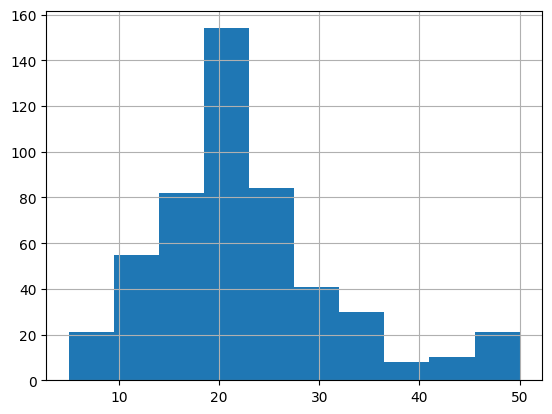

In [22]:
#2. REVISION DE LA VARIABLE TARGET PARA VER SI PODEMOS APLICAR REGRESION LINE
df["Precio medio"].hist()
#Parece que tine 

In [23]:
#3. SPLIT TRAIN & TEST
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2 , random_state = 42)

In [24]:
#4. CONSTRUIR LAS PAREJAS DE X,y
#TRAIN
X_train = train_set.drop(columns="Precio medio")
y_train = train_set[["Precio medio"]]
#TEST
X_test = test_set.drop(columns="Precio medio")
y_test = test_set[["Precio medio"]]


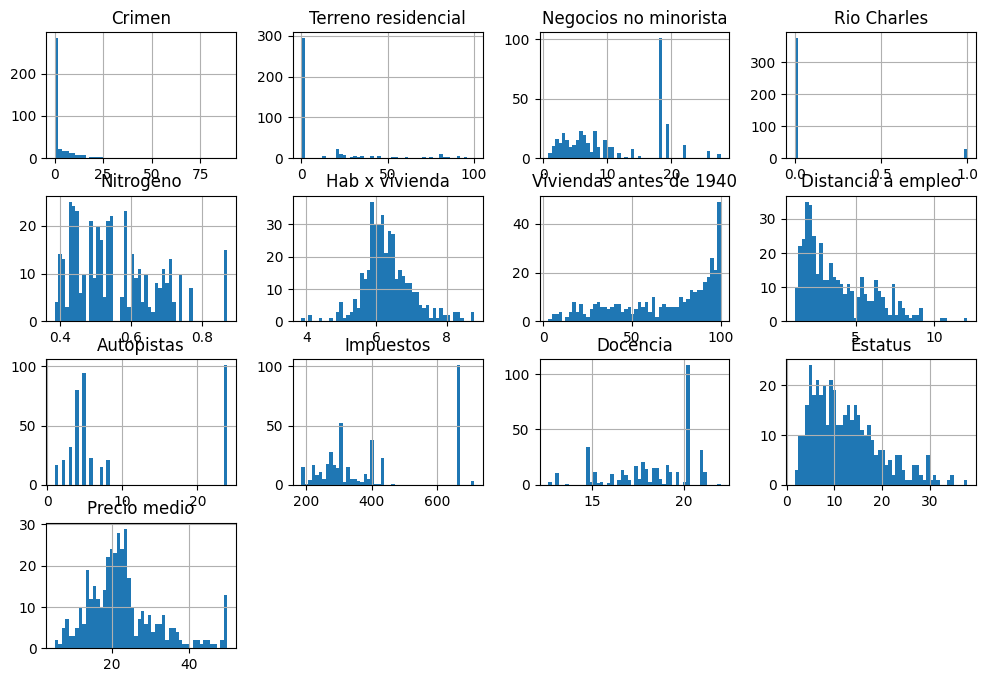

In [25]:
#5. MINI EDA & FEATURES
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [26]:
#Seria interesante ver las graficas bivarinates con el target

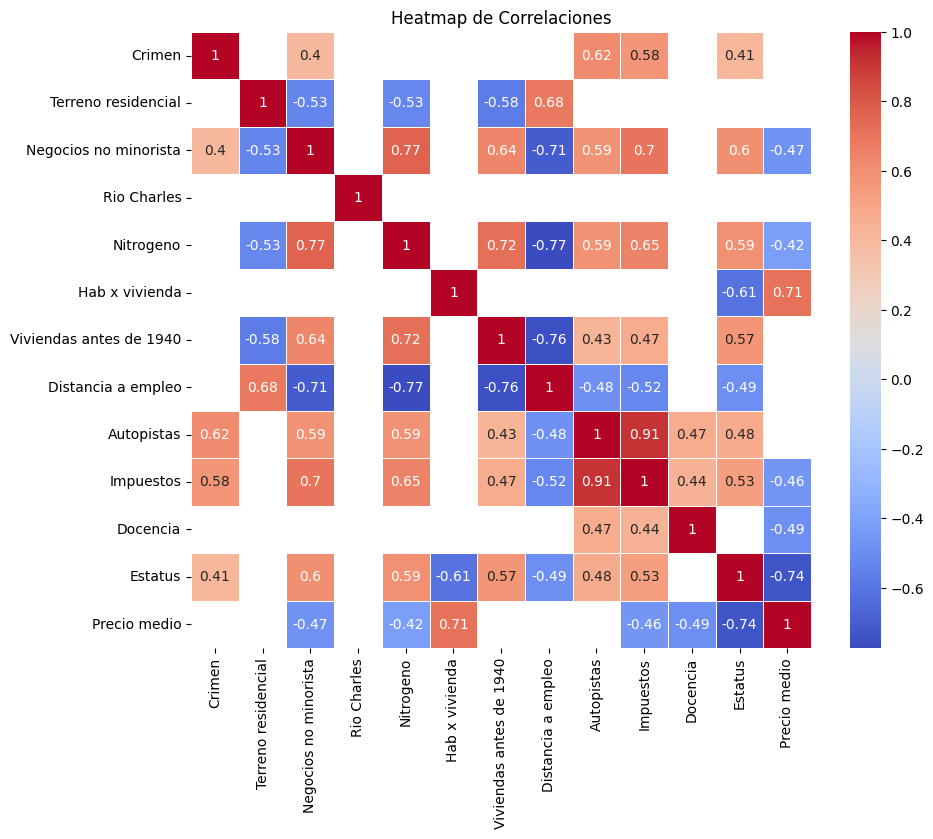

In [27]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["Precio medio"].sort_values(ascending = False)
mask = np.abs(corr_matrix) <= 0.4 #Introducir el porcentage que queremos ver

plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask = mask)
plt.title('Heatmap de Correlaciones')
plt.show()

In [28]:
# # #ELEGIMOS LAS FEATURES
# # #COGEMOS SOLO 5 PARA QUE SEA UN MODELO MÁS SIMPLE

# corr_abs = corr_matrix["Precio medio"].abs().sort_values(ascending = False)
# features_num = corr_abs[corr_abs > 0.42].index.tolist()
# features_num.remove(target)
# features_num

In [29]:
#COGEMOS TODAS LAS VAR NUMERICAS

features_num = list(df.columns)
features_num.remove(target)
features_num


['Crimen',
 'Terreno residencial',
 'Negocios no minorista',
 'Rio Charles',
 'Nitrogeno',
 'Hab x vivienda',
 'Viviendas antes de 1940',
 'Distancia a empleo',
 'Autopistas',
 'Impuestos',
 'Docencia',
 'Estatus']

In [30]:
#6. TRATAR LAS VARIABLES  


#Habria que haber hecho logaritmo para modificar la densidad de probabilidad



#Solo se hace sobre X train, la y queremos tener la real
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_standardization = pd.DataFrame(std_scaler.fit_transform(X_train[features_num]),columns = features_num)
X_test_standardization = pd.DataFrame(std_scaler.fit_transform(X_test[features_num]),columns = features_num)

In [31]:
#7. MODELO DE REGRESION LINEAL
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_standardization,y_train)

LinearRegression()

In [32]:
#8. ANALIZAR COEFICIENTES Y FEATURES
lin_reg.intercept_.flatten()

array([22.79653465])

In [33]:
lin_reg.coef_

array([[-1.12747328,  0.712109  ,  0.17385771,  0.787152  , -2.13759896,
         3.00441958, -0.10050029, -3.11945942,  2.0588977 , -1.87131687,
        -1.9918715 , -3.81901574]])

In [34]:
coef_df = pd.DataFrame(lin_reg.coef_.ravel(),  #.flatten converte el array en un array unidimensional
                    index=X_train.columns, 
                    columns=['Coefficient'])

coef_df.loc["Intercept"] = {"Coefficient": float(lin_reg.intercept_[0])} #Coge el primer valor del array, evita errores en el futuro
coef_df

,Coefficient
Crimen,-1.127473
Terreno residencial,0.712109
Negocios no minorista,0.173858
Rio Charles,0.787152
Nitrogeno,-2.137599
Hab x vivienda,3.004420
Viviendas antes de 1940,-0.100500
Distancia a empleo,-3.119459
Autopistas,2.058898
Impuestos,-1.871317


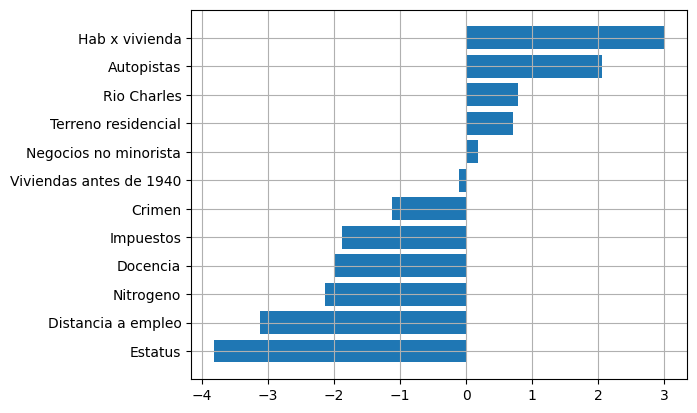

In [35]:
#VEMOS LA IMPORTANCIA DE LAS FEATURES PARA SABER COMO SIMPLIFICAMOS EL MODELO
coef_df = pd.DataFrame(lin_reg.coef_.ravel(), X_train.columns,columns=['Coefficient']).sort_values('Coefficient',ascending=True)
plt.barh(coef_df.index, coef_df.Coefficient)
plt.grid()

In [36]:
#5 (2). FEATURES
criterio = 1
coef_df_features = coef_df.loc[coef_df["Coefficient"].abs() > criterio]
features_num = list(coef_df_features.index)
features_num

['Estatus',
 'Distancia a empleo',
 'Nitrogeno',
 'Docencia',
 'Impuestos',
 'Crimen',
 'Autopistas',
 'Hab x vivienda']

In [37]:
# 6 (2). TRATAR LAS VARIABLES  

X_train_features = X_train_standardization[features_num]
X_test_features = X_test_standardization[features_num]


In [38]:
#7 (2). MODELO DE REGRESION LINEAL
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_features,y_train)

LinearRegression()

In [39]:
#8 (2). ANALIZAR COEFICIENTES Y FEATURES
lin_reg.intercept_.flatten()

array([22.79653465])

In [40]:
lin_reg.coef_

array([[-3.93341192, -2.72729146, -2.05572176, -2.28326272, -1.59340692,
        -1.15037418,  2.02735527,  3.08355849]])

In [41]:
coef_df = pd.DataFrame(lin_reg.coef_.ravel(),  #.flatten converte el array en un array unidimensional
                    index=X_train_features.columns, 
                    columns=['Coefficient'])

coef_df.loc["Intercept"] = {"Coefficient": float(lin_reg.intercept_[0])} #Coge el primer valor del array, evita errores en el futuro
coef_df

,Coefficient
Estatus,-3.933412
Distancia a empleo,-2.727291
Nitrogeno,-2.055722
Docencia,-2.283263
Impuestos,-1.593407
Crimen,-1.150374
Autopistas,2.027355
Hab x vivienda,3.083558
Intercept,22.796535


In [42]:
#9. VER TEST VS PREDICCIONES 

Text(0, 0.5, 'Target')

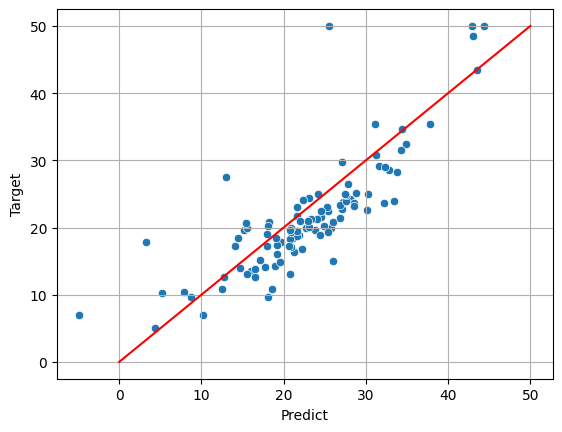

In [43]:
sns.scatterplot(y = y_test.values.ravel(), x = lin_reg.predict(X_test_features).ravel())
plt.plot([0,50],[0,50],'red')
plt.grid()
plt.xlabel('Predict')
plt.ylabel('Target')

In [44]:
#10. REGULARIZACION
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#PARA TRAIN
y_pred  = lin_reg.predict(X_train_features).ravel()
argumentos = (y_train, y_pred)
print("PARA TRAIN")
print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_train_features, y_train))

#PARA TEST
y_pred  = lin_reg.predict(X_test_features).ravel()
argumentos = (y_test, y_pred)
print("\nPARA TEST")
print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_test_features, y_test))

PARA TRAIN
MSE: 23.423760873118862
RMSE: 4.839810003824413
MAE: 3.4859057919858096
MAPE: 0.17633789477493064
R2: 0.7303690215919398

PARA TEST
MSE: 26.947234884119972
RMSE: 5.191072614028816
MAE: 3.9062534674355027
MAPE: 0.20967467714775118
R2: 0.6325399601271395


In [45]:
#RIDGE

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train_features, y_train)

#PARA TRAIN
y_pred  = ridgeR.predict(X_train_features).ravel()
argumentos = (y_train, y_pred)
print("PARA TRAIN")
print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', ridgeR.score(X_train_features, y_train))

#PARA TEST
y_pred  = ridgeR.predict(X_test_features).ravel()
argumentos = (y_test, y_pred)
print("\nPARA TEST")
print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', ridgeR.score(X_test_features, y_test))

PARA TRAIN
MSE: 23.494229531185265
RMSE: 4.847084642461411
MAE: 3.4523131796519158
MAPE: 0.17425445867309924
R2: 0.7295578566673802

PARA TEST
MSE: 26.933653370775204
RMSE: 5.189764288556389
MAE: 3.8918409015070714
MAPE: 0.20964083035976702
R2: 0.6327251614458154


In [46]:
#LASSO

lassoR = Lasso(alpha=0.001) # alpha es lambda 
lassoR.fit(X_train_features, y_train)

#PARA TRAIN
y_pred  = lassoR.predict(X_train_features).ravel()
argumentos = (y_train, y_pred)
print("PARA TRAIN")
print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', lassoR.score(X_train_features, y_train))

#PARA TEST
y_pred  = lassoR.predict(X_test_features).ravel()
argumentos = (y_test, y_pred)
print("\nPARA TEST")
print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', lassoR.score(X_test_features, y_test))

PARA TRAIN
MSE: 23.42380102324105
RMSE: 4.839814151725358
MAE: 3.485148961176477
MAPE: 0.17629746312415512
R2: 0.7303685594237685

PARA TEST
MSE: 26.948273812334268
RMSE: 5.191172681806517
MAE: 3.90609905008911
MAPE: 0.20969499769739988
R2: 0.6325257930111186


In [47]:
#ELASTIC NET

elastic_net = ElasticNet(alpha = 0.2, l1_ratio = 0.7)
elastic_net.fit(X_train_features, y_train)


#PARA TRAIN
y_pred  = elastic_net.predict(X_train_features).ravel()
argumentos = (y_train, y_pred)
print("PARA TRAIN")
print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', elastic_net.score(X_train_features, y_train))

#PARA TEST
y_pred  = elastic_net.predict(X_test_features).ravel()
argumentos = (y_test, y_pred)
print("\nPARA TEST")
print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', elastic_net.score(X_test_features, y_test))

PARA TRAIN
MSE: 24.623550031302415
RMSE: 4.962212211433769
MAE: 3.466356782401877
MAPE: 0.17393926974341514
R2: 0.7165582451604036

PARA TEST
MSE: 27.853333784140915
RMSE: 5.277625771513258
MAE: 3.9095632953906767
MAPE: 0.2146305546460684
R2: 0.6201841418265888
